In [1]:
import matplotlib.pyplot as plt

def plot_ablation(tasks, data, config, palette):
    """ 
    生成消融实验多指标对比柱状图，展示不同模型配置在多个任务上的 3 类指标（ACC，BWT，FWT）表现，结构为 “2 行 3 列” 的子图矩阵,
    1行对应一个任务，1列对应一类指标

    参数：
    tasks：列表，元素为任务名称，每个任务对应一行子图。
    data：字典，三层嵌套结构：第一层键为任务名（与tasks一致）；第二层键为配置名；第三层为数值列表，包含3个指标值（对应 ACC、BWT、FWT）。
    config：字典，键为配置名，值为配置的具体内容。
    palette：字典，键为配置名，值为 RGB 颜色元组，表示该配置柱状图的颜色。
    
    配色：
    palette = {
    'config0': (128, 128, 128),
    'config1': (142, 45, 48),
    'config2': (243, 202, 201),
    'config3': (51, 57, 91),
    'config4': (93, 116, 162),
    'config5': (196, 216, 242),
    }
    """
    for key in palette:
        r, g, b = palette[key]
        palette[key] = (r / 255., g / 255., b / 255.)
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 6), constrained_layout=True)

    for i, task in enumerate(tasks):
        for k in range(3):  
            ax = axes[i, k]
            y_vals = []
            j_index = 0
            for j in range(len(config)):  
                value = data[task][f"config{j}"][k]
                display_value = -0.5 if value == 0 else value
                y_vals.append(display_value)
                
                # Plot the bar for this configuration
                ax.bar(j, display_value, label=config[f"config{j}"] if k == 0 and i == 0 else "")
                ax.get_children()[j + j_index].set_color(palette[f"config{j}"])

                # If the value is 0, label it as 0
                if display_value == -0.5:
                    j_index += 1
                    ax.text(j, display_value - 2, '0', ha='center', va='top', fontsize=20, color='black')

            # Set axis labels and other properties
            ax.set_ylabel(["ACC(%)", "BWT(%)", "FWT(%)"][k], fontsize=20)
            ax.set_xticks([])
            ax.set_xlabel(tasks[i], fontsize=20)
            if k != 0:
                ax.axhline(y=0, color='red', linestyle='--', linewidth=2)

            # 设置y轴范围
            y_min, y_max = min(y_vals), max(y_vals)
            margin = (y_max - y_min) * 0.2   # 数据范围的30%作为边距
            ax.set_ylim([y_min - margin, y_max + margin])

            # y轴刻度保留一位小数
            if k == 2:
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.1f' % x))
            else:
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '%.0f' % x))
            # 设置y轴刻度字体大小
            ax.tick_params(axis='y', labelsize=18)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(config), fancybox=True, shadow=False, fontsize=19, columnspacing=1, handletextpad=0.2)

    plt.show()

    fig.savefig("ablation_plot.pdf", bbox_inches='tight')

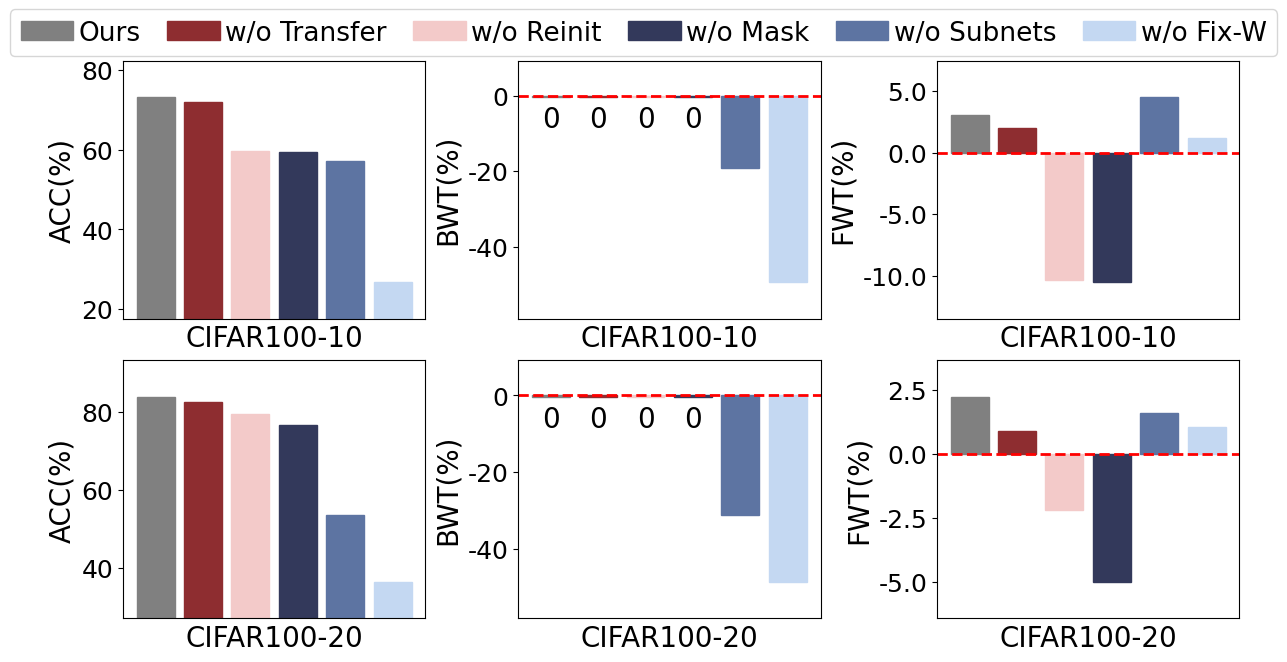

In [19]:
# 示例：

config = {
    "config0": "Ours",
    "config1": "w/o Transfer",    # 不对模型参数进行转移
    "config2": "w/o Reinit",   # 不对模型参数进行重新初始化
    "config3": "w/o Mask",   # 修改subnet，直接使用score而不是score>0
    "config4": "w/o Subnets",    # 与Finetune相同
    "config5": "w/o Fix-W",   # 设置模型参数为可训练的
}

palette = {
    'config0': (128, 128, 128),
    'config1': (142, 45, 48),
    'config2': (243, 202, 201),
    'config3': (51, 57, 91),
    'config4': (93, 116, 162),
    'config5': (196, 216, 242),
}

data = {
    "CIFAR100-10": {
        "config0": [73.1, 0, 3.1],
        "config1": [71.9, 0, 1.99],
        "config2": [59.7, 0, -10.33],
        "config3": [59.5, 0, -10.5],
        "config4": [57.2, -19.2, 4.5],
        "config5": [26.9, -49.3, 1.19]
    },
    "CIFAR100-20": {
        "config0": [83.7, 0, 2.2],
        "config1": [82.4, 0, 0.88],
        "config2": [79.4, 0, -2.2],
        "config3": [76.6, 0, -5.0],
        "config4": [53.7, -31.0, 1.6],
        "config5": [36.6, -48.4, 1.03]
    }
}

tasks = ["CIFAR100-10", "CIFAR100-20"]

plot_ablation(tasks, data, config, palette,output_file="ablation_cifar_plot.pdf")